In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os

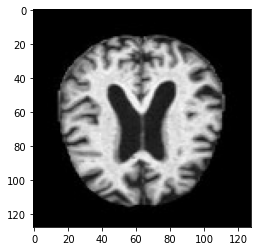

In [7]:
# show a single image
img = image.load_img('./Dataset/Original/Mild_Demented/mild.jpg')
plt.imshow(img)

In [9]:
img = cv2.imread('./Dataset/Original/Mild_Demented/mild.jpg')
print(img.shape)

(128, 128, 3)


In [1]:
# Code to split your image dataset with class folder into train & test
'''import os
import random
import shutil

def split_dataset(src_dir, dest_dir, split_ratio=0.8):
    class_folders = ['Mild_Demented', 'Moderate_Demented', 'Non_Demented', 'Very_Mild_Demented']
    for class_folder in class_folders:
        src_class_folder = os.path.join(src_dir, class_folder)
        dest_train_class_folder = os.path.join(dest_dir, 'train', class_folder)
        dest_test_class_folder = os.path.join(dest_dir, 'test', class_folder)
        if not os.path.exists(dest_train_class_folder):
            os.makedirs(dest_train_class_folder)
        if not os.path.exists(dest_test_class_folder):
            os.makedirs(dest_test_class_folder)
        image_files = [file for file in os.listdir(src_class_folder) if file.endswith('.jpg') or file.endswith('.png')]
        random.shuffle(image_files)
        split_index = int(split_ratio * len(image_files))
        train_files = image_files[:split_index]
        test_files = image_files[split_index:]
        for file in train_files:
            src_file = os.path.join(src_class_folder, file)
            dest_file = os.path.join(dest_train_class_folder, file)
            shutil.copy2(src_file, dest_file)
        for file in test_files:
            src_file = os.path.join(src_class_folder, file)
            dest_file = os.path.join(dest_test_class_folder, file)
            shutil.copy2(src_file, dest_file)

src_dir = './Dataset/Original/'
dest_dir = './Dataset/Dementia/'
split_ratio = 0.8
split_dataset(src_dir, dest_dir, split_ratio)
'''

In [11]:
# normalize image array changing (0 to 255) to (0 to 1)
train = ImageDataGenerator(rescale = 1/255)
test = ImageDataGenerator(rescale = 1/255)

In [19]:
#converting your image dataset into an input
X_train= train.flow_from_directory("./Dataset/Dementia/train",
                                    target_size = (128,128),
                                    class_mode = "categorical")
X_test = test.flow_from_directory("./Dataset/Dementia/test",
                                    target_size = (128,128),
                                    class_mode = "categorical")

Found 5119 images belonging to 4 classes.
Found 1281 images belonging to 4 classes.


In [25]:
print(X_train.class_indices)

{'Mild_Demented': 0, 'Moderate_Demented': 1, 'Non_Demented': 2, 'Very_Mild_Demented': 3}


In [2]:
# Classification CNN Model 
# Choosing sequential model
num_classes= 4
model = Sequential()
# first conv layer with 16 filter of size (3,3) and padding
model.add(Conv2D(16,(3,3),padding = "same",
                input_shape =(128,128,3)))
# Activation layer relu
model.add(Activation("relu"))
# second Conv layer with 32 filter
model.add(Conv2D(32,(3,3)))
# activation layer relu
model.add(Activation("relu"))
# Max pooling using kernel of(2,2)
model.add(MaxPooling2D(pool_size=(2,2)))
# dropout with 0.25 p
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
# adding dense layer with nodes equal to number of classes = 4
model.add(Dense(num_classes))
# last activation after dense using softmax as dataset has more than two class
model.add(Activation('softmax'))

# initiate RMSprop optimizer and configure some parameters
opt = tf.keras.optimizers.RMSprop(learning_rate=0.0001, decay=1e-6)

# Let's create our model
model.compile(loss = 'categorical_crossentropy',
              optimizer = opt,
              metrics = ['accuracy'])

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 16)      448       
                                                                 
 activation (Activation)     (None, 128, 128, 16)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 126, 126, 32)      4640      
                                                                 
 activation_1 (Activation)   (None, 126, 126, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 63, 63, 32)        0         
                                                        

In [31]:
batch_size = 32
epochs = 10
model.fit(X_train,
         batch_size= batch_size,
         epochs=epochs,
         validation_data=X_test)

Epoch 1/10
160/160 [==============================] - 262s 2s/step - loss: 0.9459 - accuracy: 0.5419 - val_loss: 0.9408 - val_accuracy: 0.5394
Epoch 2/10
160/160 [==============================] - 261s 2s/step - loss: 0.8884 - accuracy: 0.5886 - val_loss: 0.9020 - val_accuracy: 0.6058
Epoch 3/10
160/160 [==============================] - 261s 2s/step - loss: 0.8276 - accuracy: 0.6155 - val_loss: 0.8751 - val_accuracy: 0.6479
Epoch 4/10
160/160 [==============================] - 246s 2s/step - loss: 0.7502 - accuracy: 0.6720 - val_loss: 0.7191 - val_accuracy: 0.6690
Epoch 5/10
160/160 [==============================] - 247s 2s/step - loss: 0.6601 - accuracy: 0.7164 - val_loss: 0.6698 - val_accuracy: 0.7057
Epoch 6/10
160/160 [==============================] - 263s 2s/step - loss: 0.5524 - accuracy: 0.7640 - val_loss: 0.5532 - val_accuracy: 0.7713
Epoch 7/10
160/160 [==============================] - 244s 2s/step - loss: 0.4891 - accuracy: 0.7972 - val_loss: 0.4921 - val_accuracy: 0.8072

In [32]:
model.save("Dementia_model.h5")

In [4]:
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np

# Load the saved model
model = load_model("Dementia_model.h5")

# Load the test image
img_path = "./Dataset/Dementia/test/Moderate_Demented/moderate_11.jpg"
img = image.load_img(img_path)

# Preprocess the image
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = x / 255.0  # Normalize the pixel values

# Predict the class probabilities
preds = model.predict(x)

# Get the predicted class index
class_idx = np.argmax(preds[0])

# Get the predicted class label
if class_idx == 0:
    class_label = "MildDemented"
elif class_idx == 1:
    class_label = "ModerateDemented"
elif class_idx == 2:
    class_label = "NonDemented"
else:
    class_label = "VeryMildDemented"

# Print the predicted class label
print("Predicted class label:", class_label)

1/1 [==============================] - 1s 1s/step
Predicted class label: ModerateDemented
